In [ ]:
#STEP 1 - DATA COLLECTION AND EXTRACTION

In [ ]:
import os
import re
import zipfile
from xml.etree.ElementTree import XML
import pdfplumber   
from typing import Dict, List, Optional

def extract_text_from_docx_xml(file_path: str) -> str:
    """Extract text from a DOCX file by parsing its XML content."""
    text = []
    try:
        with zipfile.ZipFile(file_path, "r") as docx:
            # Main document text
            if "word/document.xml" in docx.namelist():
                xml_content = docx.read("word/document.xml")
                tree = XML(xml_content)
                text.extend([node.text for node in tree.iter() if node.text])
            
            # Headers
            for i in range(3):  # Check up to 3 headers
                header_path = f"word/header{i}.xml"
                if header_path in docx.namelist():
                    header_content = docx.read(header_path)
                    header_tree = XML(header_content)
                    text.extend([node.text for node in header_tree.iter() if node.text])
            
            # Footers
            for i in range(3):  # Check up to 3 footers
                footer_path = f"word/footer{i}.xml"
                if footer_path in docx.namelist():
                    footer_content = docx.read(footer_path)
                    footer_tree = XML(footer_content)
                    text.extend([node.text for node in footer_tree.iter() if node.text])
    except Exception as e:
        print(f"Error extracting text from {file_path}: {e}")
        return ""
    
    return "\n".join(filter(None, text))

def extract_text_from_pdf(file_path: str) -> str:
    """Extract text from a PDF file using pdfplumber."""
    text = []
    try:
        with pdfplumber.open(file_path) as pdf:
            for page in pdf.pages:
                extracted_text = page.extract_text()
                if extracted_text:
                    text.append(extracted_text)
    except Exception as e:
        print(f"Error extracting text from {file_path}: {e}")
        return ""
    
    return "\n".join(text)

def process_documents_in_folder(folder_path: str) -> List[Dict[str, str]]:
    """Process all DOCX and PDF files in a folder."""
    extracted_data = []
    
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        print(f"Processing: {file_name}")
        
        try:
            text = None
            if file_name.lower().endswith(".docx"):
                text = extract_text_from_docx_xml(file_path)
            elif file_name.lower().endswith(".pdf"):
                text = extract_text_from_pdf(file_path)
                
            if text is not None:
                extracted_data.append({
                    "file_name": file_name,
                    "text": text
                })
        except Exception as e:
            print(f"Failed to process {file_name}: {e}")
    
    return extracted_data

# Example usage
folder_path = r"C:\Users\Projects\new_resumemodel\web\NLPresume"  # Replace with your folder path
extracted_documents = process_documents_in_folder(folder_path)

# Print summaries of the extracted data
for doc in extracted_documents:
    print(f"File: {doc['file_name']}")
    print(f"Extracted Text:", doc['text'])
    print("-" * 80)

Processing: Abhishek-Jain-Telco-OSS.pdf
Processing: Agney Galande.pdf
Processing: ATS Bold accounting resume.docx
Processing: ATS classic HR resume.docx
Processing: ATS finance resume.docx
Processing: ATS stylish accounting resume.docx
Processing: Attorney resume.docx
Processing: Bold attorney resume (1).docx
Processing: Classic management resume (1).docx
Processing: Classic UIUX designer resume.docx
Processing: cleaned_resumes
Processing: Industry manager resume (1).docx
Processing: Modern hospitality resume (1).docx
Processing: Resume (11).docx
Processing: Resume chronological.docx
Processing: Simple resume .docx
Processing: Simple UIUX designer resume.docx
Processing: Stylish sales resume (2).docx
Processing: White minimalist graphic designer resume.docx
File: Abhishek-Jain-Telco-OSS.pdf
Extracted Text: Abhishek Jain
04.abhishek@gmail.com
+91-9711074323
Professional synopsis
• Telecom OSS Solutions Architect with 16 years of work experience mainly in Service and Resource Fulfilment,

In [ ]:
#STEP 2 - DATA PROCESSING

In [2]:
import os
import re

def clean_text(raw_text):
    """Clean the extracted text by removing unwanted characters and normalizing it."""
    # Remove any non-printable characters (like control characters)
    cleaned_text = ''.join(char for char in raw_text if char.isprintable())
    
    # Replace multiple spaces or newlines with a single space or newline
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)  # Reduce all whitespace to a single space
    cleaned_text = re.sub(r'\n+', '\n', cleaned_text)  # Reduce multiple newlines to a single newline
    
    # Strip leading and trailing whitespace
    cleaned_text = cleaned_text.strip()
    
    return cleaned_text

def save_resumes_to_text_files(cleaned_resumes, output_folder):
    """
    Save each cleaned resume to a separate text file.
    
    Args:
        cleaned_resumes (list): List of dictionaries containing file names and cleaned text
        output_folder (str): Path to the folder where text files will be saved
    """
    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)
    
    # Save each resume to a separate text file
    for resume in cleaned_resumes:
        # Create a valid filename from the original filename
        base_name = os.path.splitext(resume['file_name'])[0]
        output_file = os.path.join(output_folder, f"{base_name}.txt")
        
        # Write the cleaned text to the file
        with open(output_file, 'w', encoding='utf-8') as f:
            f.write(resume['cleaned_text'])
        
        print(f"Saved: {output_file}")

# Example usage
folder_path = r"C:\Users\Projects\new_resumemodel\web\NLPresume"  # Input folder
output_folder = os.path.join(folder_path, "cleaned_resumes")  # Output folder for text files

# Process and clean the resumes (using your existing code)
extracted_resumes = process_documents_in_folder(folder_path)
cleaned_resumes = []
for resume in extracted_resumes:
    cleaned_text = clean_text(resume['text'])
    cleaned_resumes.append({
        "file_name": resume['file_name'],
        "cleaned_text": cleaned_text
    })

# Save the cleaned resumes to text files
save_resumes_to_text_files(cleaned_resumes, output_folder)

Processing: Abhishek-Jain-Telco-OSS.pdf
Processing: Agney Galande.pdf
Processing: ATS Bold accounting resume.docx
Processing: ATS classic HR resume.docx
Processing: ATS finance resume.docx
Processing: ATS stylish accounting resume.docx
Processing: Attorney resume.docx
Processing: Bold attorney resume (1).docx
Processing: Classic management resume (1).docx
Processing: Classic UIUX designer resume.docx
Processing: cleaned_resumes
Processing: Industry manager resume (1).docx
Processing: Modern hospitality resume (1).docx
Processing: Resume (11).docx
Processing: Resume chronological.docx
Processing: Simple resume .docx
Processing: Simple UIUX designer resume.docx
Processing: Stylish sales resume (2).docx
Processing: White minimalist graphic designer resume.docx
Saved: C:\Users\Projects\new_resumemodel\web\NLPresume\cleaned_resumes\Abhishek-Jain-Telco-OSS.txt
Saved: C:\Users\Projects\new_resumemodel\web\NLPresume\cleaned_resumes\Agney Galande.txt
Saved: C:\Users\Projects\new_resumemodel\web

In [ ]:
#STEP 3 - DATA ANNOTATION

In [2]:
# SPACY custom_ner_model (With prepared training data)

In [31]:
# import spacy
# from spacy.training.example import Example
# import random
# from trainingdata import TRAIN_DATA

# # Load the base model
# nlp = spacy.load("en_core_web_lg")

# # Add the custom labels to the NER pipe if they are not already there
# ner = nlp.get_pipe("ner")

# # Add custom labels
# custom_labels = [
#     "name", "address", "email", "phone", "career_objective", "linkedin", "github",
#     "company", "date", "responsibility", "institution", "degree",
#      "job_title", "state","city", "language", "certification",
#     "hobby","skill"
# ]

# for label in custom_labels:
#     ner.add_label(label)

# # Advanced function to handle overlapping entities
# def resolve_overlapping_entities(entities):
#     # Sort entities by start position and length (longest first)
#     sorted_entities = sorted(entities, key=lambda x: (x[0], -x[1]))
    
#     # Unique entity tracking
#     unique_entities = []
#     used_tokens = set()

#     for start, end, label in sorted_entities:
#         # Check if this entity conflicts with existing entities
#         if not any(t in used_tokens for t in range(start, end)):
#             unique_entities.append((start, end, label))
#             used_tokens.update(range(start, end))
    
#     return unique_entities

# # Convert the training data to SpaCy's Example format
# examples = []
# for training_example in TRAIN_DATA:
#     # Resolve overlapping entities
#     cleaned_entities = resolve_overlapping_entities(training_example["entities"])
    
#     doc = nlp.make_doc(training_example["text"])
#     example = Example.from_dict(doc, {"entities": cleaned_entities})
#     examples.append(example)

# # Train the model
# optimizer = nlp.begin_training()

# # Training loop
# for epoch in range(50):
#     print(f"Training epoch {epoch + 1}")
#     random.shuffle(examples)
#     losses = {}
#     for example in examples:
#         nlp.update([example], drop=0.5, losses=losses)
#     print(f"Losses: {losses}")

# # Save the trained model
# nlp.to_disk("custom_ner_model")

In [1]:
# /resume_ner_model

In [ ]:
# # train_model.py

# import spacy
# from spacy.training import Example
# import random
# from nlptrain import train_data

# def fine_tune_ner(train_data, base_model='en_core_web_lg', output_dir='./resume_ner_model'):
#     # Load base model
#     nlp = spacy.load(base_model)
    
#     # Create NER pipeline if not exists
#     if 'ner' not in nlp.pipe_names:
#         ner = nlp.add_pipe('ner')
#     else:
#         ner = nlp.get_pipe('ner')
    
#     # Add custom labels
#     custom_labels = [
#         "NAME", "EMAIL", "PHONE", "CITY","STATE", "GITHUB","LINKEDIN",
#         "DEGREE", "UNIVERSITY",
#         "COMPANY", "JOB_TITLE", "DATE","RESPONSIBILITY",
#         "CERTIFICATION","HOBBY","LANGUAGE","SKILL"
#     ]
    
#     for label in custom_labels:
#         ner.add_label(label)
    
#     # Prepare training data
#     train_examples = []
#     for text, annotations in train_data:
#         doc = nlp.make_doc(text)
#         example = Example.from_dict(doc, annotations)
#         train_examples.append(example)
    
#     # Training configuration
#     other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']
    
#     # Disable other pipes during training
#     with nlp.disable_pipes(*other_pipes):
#         optimizer = nlp.resume_training()
        
#         # Training loop
#         for iteration in range(100):
#             random.shuffle(train_examples)
#             losses = {}
#             nlp.update(train_examples, drop=0.5, losses=losses)
#             print(f"Iteration {iteration}, Losses: {losses}")
    
#     # Save the model
#     nlp.to_disk(output_dir)
#     print(f"Model saved to {output_dir}")
    
#     return nlp

# if __name__ == "__main__":
#     # Fine-tune the model
#     model = fine_tune_ner(train_data)

Iteration 0, Losses: {'ner': 36.590480759328}
Iteration 1, Losses: {'ner': 30.043924794521075}
Iteration 2, Losses: {'ner': 35.79565187804612}
Iteration 3, Losses: {'ner': 26.5545143243832}
Iteration 4, Losses: {'ner': 25.858561613205758}
Iteration 5, Losses: {'ner': 24.588463105900686}
Iteration 6, Losses: {'ner': 21.232137685724926}
Iteration 7, Losses: {'ner': 18.133504339550576}
Iteration 8, Losses: {'ner': 17.925751111217224}
Iteration 9, Losses: {'ner': 18.378380246708797}
Iteration 10, Losses: {'ner': 21.097448430330502}
Iteration 11, Losses: {'ner': 16.399566089043706}
Iteration 12, Losses: {'ner': 17.855991693098254}
Iteration 13, Losses: {'ner': 16.25611762452895}
Iteration 14, Losses: {'ner': 17.637451399201403}
Iteration 15, Losses: {'ner': 17.796810141444887}
Iteration 16, Losses: {'ner': 17.20067251439593}
Iteration 17, Losses: {'ner': 17.962891539639244}
Iteration 18, Losses: {'ner': 16.799625818396613}
Iteration 19, Losses: {'ner': 15.817308118730233}
Iteration 20, Loss

In [ ]:
# import spacy

# # Load the trained model
# nlp = spacy.load("custom_ner_model")

# # Test texts (from the training data)
# test_texts = [
#    "Gayatri Ghorpade,a student studying at Dr.D.Y.Patil Vidyapeeth,Pune is a Software Developer"
# ]

# # Function to print entities
# def print_entities(doc):
#     print("Entities:")
#     for ent in doc.ents:
#         print(f"{ent.text} - {ent.label_}")

# # Test the model
# for text in test_texts:
#     doc = nlp(text)
#     # print("\nText:", text)
#     print_entities(doc)

Entities:
Gayatri Ghorpade, - NAME
D.Y.Patil Vidyapeeth, - NAME


In [ ]:
# NER MODEL TRAINING - DATABASE PIPELINING

In [11]:
# Step 1: Import necessary libraries
import spacy
from spacy.training.example import Example
import random
from pymongo import MongoClient
import logging
from typing import List, Dict, Tuple
from datetime import datetime
import json
import os
import matplotlib.pyplot as plt

In [13]:
# Step 2: Set up logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)
logger = logging.getLogger(__name__)


In [14]:
# Step 3: Define the NERTrainer class
class NERTrainer:
    def __init__(self, mongo_uri: str, db_name: str, collection_name: str):
        """
        Initialize the NER trainer with MongoDB connection details.
        """
        self.mongo_uri = mongo_uri
        self.db_name = db_name
        self.collection_name = collection_name
        self.custom_labels = [
            "NAME", "EMAIL", "PHONE", "CITY", "STATE", "GITHUB", "LINKEDIN",
            "DEGREE", "UNIVERSITY", "COMPANY", "JOB_TITLE", "DATE", "RESPONSIBILITY",
            "CERTIFICATION", "HOBBY", "LANGUAGE", "SKILL"
        ]
        # Add loss tracking
        self.loss_history = []
        self.epoch_history = []
        
    def save_training_format(self, training_data: List[Dict]) -> str:
        """
        Save training data in spaCy training format.
        Format: List of {"text": "...", "entities": [(start, end, label)]}
        """
        try:
            # Create output directory if it doesn't exist
            os.makedirs("training_data", exist_ok=True)
            
            # Generate filename with timestamp
            timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
            filename = f"spacy_training_data_{timestamp}.json"
            filepath = os.path.join("training_data", filename)
            
            # Save raw training data
            with open(filepath, 'w', encoding='utf-8') as f:
                json.dump(training_data, f, indent=2, ensure_ascii=False)
            
            logger.info(f"Training data saved in spaCy format to: {filepath}")
            logger.info(f"Number of training examples: {len(training_data)}")
            
            return filepath
            
        except Exception as e:
            logger.error(f"Error saving training data: {e}")
            raise
            
    def load_training_data(self) -> List[Dict]:
        """
        Load training data from MongoDB and save it in training format.
        """
        try:
            client = MongoClient(self.mongo_uri)
            db = client[self.db_name]
            collection = db[self.collection_name]
            
            training_data = []
            for doc in collection.find():
                if 'training_data' in doc:
                    td = doc['training_data']
                    if isinstance(td, dict) and 'text' in td and 'entities' in td:
                        training_data.append({
                            'text': td['text'],
                            'entities': td['entities']
                        })
            
            logger.info(f"Loaded {len(training_data)} training examples from MongoDB")
            
            # Save in training format
            self.save_training_format(training_data)
            
            return training_data
            
        except Exception as e:
            logger.error(f"Error loading data from MongoDB: {e}")
            return []
            
        finally:
            client.close()

    def resolve_overlapping_entities(self, entities: List[Tuple[int, int, str]]) -> List[Tuple[int, int, str]]:
        """
        Resolve overlapping entities by keeping the longest span.
        """
        # Sort entities by start position and length (longest first)
        sorted_entities = sorted(entities, key=lambda x: (x[0], -x[1]))
        
        # Unique entity tracking
        unique_entities = []
        used_tokens = set()
        
        for start, end, label in sorted_entities:
            # Check if this entity conflicts with existing entities
            if not any(t in used_tokens for t in range(start, end)):
                unique_entities.append((start, end, label))
                used_tokens.update(range(start, end))
        
        return unique_entities

    def prepare_examples(self, nlp, training_data: List[Dict]) -> List[Example]:
        """
        Convert training data to spaCy Example format.
        """
        examples = []
        for training_example in training_data:
            # Resolve overlapping entities
            cleaned_entities = self.resolve_overlapping_entities(training_example["entities"])
            
            doc = nlp.make_doc(training_example["text"])
            example = Example.from_dict(doc, {"entities": cleaned_entities})
            examples.append(example)
        
        return examples

    def train_model(self, training_data: List[Dict], epochs: int = 50, dropout: float = 0.5):
        """
        Train the NER model with the provided training data.
        """
        try:
            # Load the base model
            logger.info("Loading base model...")
            nlp = spacy.load("en_core_web_lg")
            
            # Get the NER pipe
            ner = nlp.get_pipe("ner")
            
            # Add custom labels
            logger.info("Adding custom labels...")
            for label in self.custom_labels:
                ner.add_label(label)
            
            # Prepare training examples
            logger.info("Preparing training examples...")
            examples = self.prepare_examples(nlp, training_data)
            
            # Initialize optimizer
            optimizer = nlp.begin_training()
            
            # Lists to store epoch-wise losses for plotting
            epoch_losses = []
            
            # Training loop
            logger.info("Starting training...")
            print("\n" + "="*80)
            print(f"TRAINING PROGRESS - {len(examples)} examples, {epochs} epochs")
            print("="*80)
            
            for epoch in range(epochs):
                random.shuffle(examples)
                losses = {}
                
                # Track progress
                batch_size = 10
                batches = [examples[i:i + batch_size] for i in range(0, len(examples), batch_size)]
                
                epoch_loss = 0
                for i, batch in enumerate(batches):
                    nlp.update(batch, drop=dropout, losses=losses)
                    
                    # Track batch loss
                    current_ner_loss = losses.get('ner', 0)
                    epoch_loss += current_ner_loss
                    
                    # Print progress bar for each epoch
                    progress = (i + 1) / len(batches)
                    progress_bar = "█" * int(50 * progress) + "░" * (50 - int(50 * progress))
                    print(f"\rEpoch {epoch+1}/{epochs} [{progress_bar}] {progress*100:.1f}% - Current NER Loss: {current_ner_loss:.4f}", end="")
                
                # Calculate average loss for this epoch
                avg_epoch_loss = epoch_loss / len(batches)
                epoch_losses.append(avg_epoch_loss)
                
                # Track epoch data
                self.epoch_history.append(epoch + 1)
                self.loss_history.append(avg_epoch_loss)
                
                print(f"\rEpoch {epoch+1}/{epochs} [{'█'*50}] 100.0% - Avg NER Loss: {avg_epoch_loss:.4f}")
            
            # Plot the loss curve
            self._plot_loss_curve(epoch_losses)
            
            # Save the model with timestamp
            timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
            output_path = f"custom_ner_model_{timestamp}"
            nlp.to_disk(output_path)
            logger.info(f"Model saved to {output_path}")
            
            # Print final loss summary
            print("\n" + "="*80)
            print("TRAINING COMPLETED")
            print("="*80)
            print(f"Final Loss: {epoch_losses[-1]:.4f}")
            print(f"Initial Loss: {epoch_losses[0]:.4f}")
            print(f"Improvement: {epoch_losses[0] - epoch_losses[-1]:.4f} ({(1 - epoch_losses[-1]/epoch_losses[0]) * 100:.2f}%)")
            print("="*80)
            
            return output_path
            
        except Exception as e:
            logger.error(f"Error during training: {e}")
            raise
    
    def _plot_loss_curve(self, losses):
        """
        Plot and save the loss curve.
        """
        try:
            plt.figure(figsize=(10, 6))
            plt.plot(range(1, len(losses) + 1), losses, marker='o')
            plt.title('NER Training Loss Over Epochs')
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.grid(True)
            
            # Save the plot
            os.makedirs("training_metrics", exist_ok=True)
            timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
            plt.savefig(f"training_metrics/loss_curve_{timestamp}.png")
            
            print(f"\nLoss curve saved to: training_metrics/loss_curve_{timestamp}.png")
            
            # Save the loss data
            with open(f"training_metrics/loss_data_{timestamp}.json", 'w') as f:
                json.dump({
                    "epochs": list(range(1, len(losses) + 1)),
                    "losses": losses
                }, f, indent=2)
            
            # Print path to the data
            print(f"Loss data saved to: training_metrics/loss_data_{timestamp}.json")
            
        except Exception as e:
            logger.error(f"Error plotting loss curve: {e}")


In [19]:
# Step 4: Configure MongoDB connection
# Make sure to update these values with your actual MongoDB credentials
MONGO_URI = "mongodb+srv://***"
DB_NAME = "resume_db"
COLLECTION_NAME = "ner_training_data"

In [20]:

# Step 5: Initialize the NERTrainer
trainer = NERTrainer(MONGO_URI, DB_NAME, COLLECTION_NAME)

In [21]:
# Step 6: Load training data from MongoDB
print("Loading training data from MongoDB...")
training_data = trainer.load_training_data()

Loading training data from MongoDB...


2025-03-10 13:36:06,451 - INFO - Loaded 2 training examples from MongoDB
2025-03-10 13:36:06,464 - INFO - Training data saved in spaCy format to: training_data\spacy_training_data_20250310_133606.json
2025-03-10 13:36:06,465 - INFO - Number of training examples: 2


In [22]:
# Step 7: Check if training data was loaded successfully
if not training_data:
    print("No training data found. Please check your MongoDB connection and collection.")
else:
    print(f"Successfully loaded {len(training_data)} training examples.")
    
    # Optional: Display a sample of the training data
    if len(training_data) > 0:
        print("\nSample training example:")
        print(f"Text: {training_data[0]['text'][:100]}...")
        print(f"Entities: {training_data[0]['entities'][:3]}...")

Successfully loaded 2 training examples.

Sample training example:
Text: Anurag Soni
sonianurag476@gmail.com 8889584826 LinkedIn GitHub LeetCode Portfolio
Education
LNCT Uni...
Entities: [[0, 11, 'NAME'], [12, 35, 'EMAIL'], [36, 46, 'PHONE']]...


2025-03-10 13:36:34,447 - INFO - Loading base model...



Starting model training...


c:\Users\aryan\anaconda3\Lib\site-packages\spacy\util.py:910: UserWarning: [W095] Model 'en_core_web_lg' (3.7.1) was trained with spaCy v3.7.2 and may not be 100% compatible with the current version (3.8.3). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)
2025-03-10 13:36:42,382 - INFO - Adding custom labels...
2025-03-10 13:36:42,516 - INFO - Preparing training examples...
c:\Users\aryan\anaconda3\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Anurag Soni
sonianurag476@gmail.com 8889584826 Lin..." with entities "[(0, 11, 'NAME'), (12, 35, 'EMAIL'), (36, 46, 'PHO...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.


TRAINING PROGRESS - 2 examples, 50 epochs
Epoch 1/50 [██████████████████████████████████████████████████] 100.0% - Avg NER Loss: 864.85818581
Epoch 2/50 [██████████████████████████████████████████████████] 100.0% - Avg NER Loss: 892.17661766
Epoch 3/50 [██████████████████████████████████████████████████] 100.0% - Avg NER Loss: 899.96999699
Epoch 4/50 [██████████████████████████████████████████████████] 100.0% - Avg NER Loss: 875.35973597
Epoch 5/50 [██████████████████████████████████████████████████] 100.0% - Avg NER Loss: 863.27722772
Epoch 6/50 [██████████████████████████████████████████████████] 100.0% - Avg NER Loss: 1554.47414741
Epoch 7/50 [██████████████████████████████████████████████████] 100.0% - Avg NER Loss: 892.04300430
Epoch 8/50 [██████████████████████████████████████████████████] 100.0% - Avg NER Loss: 874.63676367
Epoch 9/50 [██████████████████████████████████████████████████] 100.0% - Avg NER Loss: 1554.24102410
Epoch 10/50 [██████████████████████████████████████████

2025-03-10 13:37:34,058 - INFO - Model saved to custom_ner_model_20250310_133722



TRAINING COMPLETED
Final Loss: 196.8041
Initial Loss: 864.8581
Improvement: 668.0540 (77.24%)


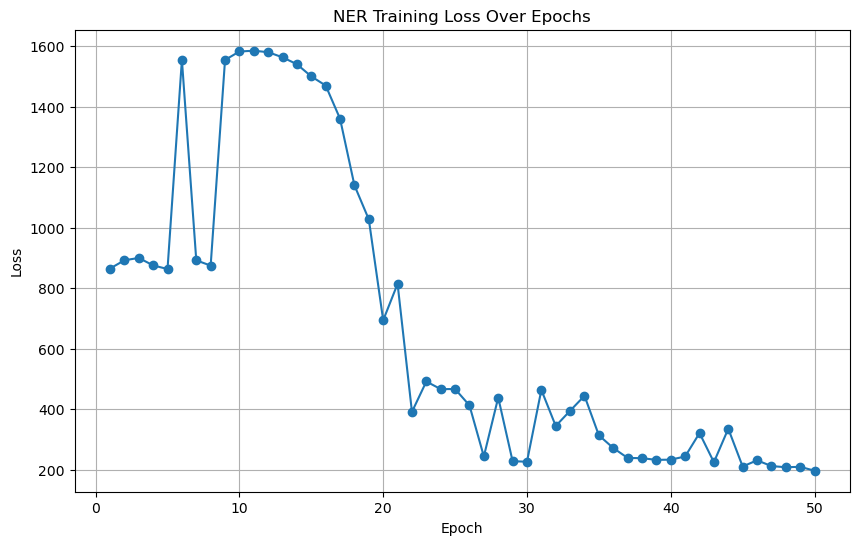

In [23]:
# Step 8: Train the model
# Note: This cell might take a long time to execute depending on your data size and epochs
print("\nStarting model training...")
# You can adjust epochs and dropout rate as needed
output_path = trainer.train_model(training_data, epochs=50, dropout=0.5)

In [29]:
# Step 9: Load and test the trained model
print(output_path)
print("\nTesting the trained model...")
nlp = spacy.load(output_path)

# Test with a sample text
test_text = "John Smith graduated from Stanford University with a Computer Science degree and works at Google as a Senior Software Engineer."
doc = nlp(test_text)

# Display entities
print("\nDetected entities in test text:")
for ent in doc.ents:
    print(f"{ent.text} - {ent.label_}")

custom_ner_model_20250310_133722

Testing the trained model...


c:\Users\aryan\anaconda3\Lib\site-packages\spacy\util.py:910: UserWarning: [W095] Model 'en_core_web_lg' (3.7.1) was trained with spaCy v3.7.2 and may not be 100% compatible with the current version (3.8.3). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)



Detected entities in test text:


c:\Users\aryan\anaconda3\Lib\site-packages\spacy\pipeline\attributeruler.py:149: UserWarning: [W036] The component 'matcher' does not have any patterns defined.
  matches = self.matcher(doc, allow_missing=True, as_spans=False)
c:\Users\aryan\anaconda3\Lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [ ]:
# Step 10: Visualize the entities (optional)
from spacy import displacy
html = displacy.render(doc, style="ent")

c:\Users\aryan\anaconda3\Lib\site-packages\spacy\displacy\__init__.py:213: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)
